In [152]:
# Import dependencies:
from pathlib import Path
import pandas as pd

# Part One:
In this part, we will analyze cryptocurrencies as an investment option and we would like to answer the following question:

## Are cryptocurrencies growing in popularity in comparison to the traditional stock market?

We will use historical data of market index SP 500 aganist our cryptocurrency portfolio that consists of the top 3 currencies, to compare Risk, Returns and Trading Volume.

Input Files we will use to demonstrate the comparison:
1. SP_500
2. ETH_DATA
3. BTC_DATA
4. XRP_DATA

Output Files that will hold calculated values and used in graphs:
1. Combined Dataframe for the 2 porfolio
2. Quantitative Analysis indictors & graphs

In [153]:
# Determine csv path for Crypto-folio:
eth_file = Path ('Messari-Ethereum-Historical-Data-July 2015-July 2020.csv')
btc_file = Path('Messari-XRP-Historical-Data-July 2015-July 2020.csv')
xrp_file = Path('Messari-XRP-Historical-Data-July 2015-July 2020.csv')

# Determine csv path for market index:
sp500_file = Path('SPY_5yData.csv')

# Pass the file to pandas and define the index:
eth_df = pd.read_csv(eth_file, index_col = "date", parse_dates=True)
btc_df = pd.read_csv(btc_file, index_col = "date", parse_dates=True)
xrp_df = pd.read_csv(xrp_file, index_col = "date", parse_dates=True)

# Pass market index to pandas and define index:
sp500_df = pd.read_csv(sp500_file, index_col = "Date", parse_dates=True)

In [154]:
# testing the dataframe:
xrp_df.head()
eth_df.head()
btc_df.head()
sp500_df.head()

,SPY close,shares traded
Date,,
8/3/2015,209.79,113965728
8/4/2015,209.38,81820823
8/5/2015,210.07,85786817
8/6/2015,208.35,116030803
8/7/2015,207.95,117857956


In [155]:
# Dropping unnecessary columns in crypto-folio:
eth_df.drop(columns=["timestamp", "high", "open", "low"], inplace=True)
btc_df.drop(columns=["timestamp", "high", "open", "low"], inplace=True)
xrp_df.drop(columns=["timestamp", "high", "open", "low"], inplace=True)


In [156]:
# Rename columns to reflect each crypto-ticker:
eth_df = eth_df.rename(columns= {'close':'ETH Close', 'volume':'ETH Volume'})
btc_df = btc_df.rename(columns= {'close':'BTC Close', 'volume':'BTC Volume'})
xrp_df = xrp_df.rename(columns= {'close':'XRP Close', 'volume':'XRP Volume'})
btc_df.head()

,BTC Close,BTC Volume
date,,
2015-07-31,0.008225,4003.876800
2015-08-01,0.008100,9140.735562
2015-08-02,0.008223,2300.203654
2015-08-03,0.008135,5654.083618
2015-08-04,0.008276,4416.310602


In [157]:
# Rename market index columns to match correspondence columns:
sp500_df = sp500_df.rename(columns = {'SPY close':'SP500 Close', 'shares traded':'SP500 Volume'})
sp500_df.head()

,SP500 Close,SP500 Volume
Date,,
8/3/2015,209.79,113965728
8/4/2015,209.38,81820823
8/5/2015,210.07,85786817
8/6/2015,208.35,116030803
8/7/2015,207.95,117857956


In [209]:
# Calculate Daily returns for each ticker:
eth_returns=eth_df['ETH Close'].pct_change()
eth_returns.head() # notice name is ETH Close still, need to change but it's a series!

# convert series to dataframe:
eth_returns = eth_returns.to_frame()

# reanme colum & drop null:
eth_returns = eth_returns.rename(columns={'ETH Close':'ETH'})
eth_returns.dropna(inplace=True)
eth_returns.head()

,ETH
date,
2015-08-08,-0.727096
2015-08-09,-0.162446
2015-08-10,0.021857
2015-08-11,0.531874
2015-08-12,0.120084


In [208]:
btc_returns=btc_df['BTC Close'].pct_change()
btc_returns = btc_returns.to_frame()
btc_returns = btc_returns.rename(columns={'BTC Close':'BTC'})
btc_returns.dropna(inplace=True)
btc_returns.head()

,BTC
date,
2015-08-01,-0.015198
2015-08-02,0.015185
2015-08-03,-0.010702
2015-08-04,0.017333
2015-08-05,-0.009183


In [207]:
xrp_returns=xrp_df['XRP Close'].pct_change()
xrp_returns = xrp_returns.to_frame()
xrp_returns = xrp_returns.rename(columns={'XRP Close':'XRP'})
xrp_returns.dropna(inplace=True)
xrp_returns.head()

,XRP
date,
2015-08-01,-0.015198
2015-08-02,0.015185
2015-08-03,-0.010702
2015-08-04,0.017333
2015-08-05,-0.009183


In [206]:
sp500_returns = sp500_df['SP500 Close'].pct_change()
sp500_returns = sp500_returns.to_frame()
sp500_returns = sp500_returns.rename(columns={'SP500 Close':'SP500'})
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,SP500
Date,
8/4/2015,-0.001954
8/5/2015,0.003295
8/6/2015,-0.008188
8/7/2015,-0.001920
8/10/2015,0.012599


In [161]:
""""""""
didn't do it because it's impossible to calculate to analyze portfolio with 3 columns for each crypto and market index
"""""""
# Calculate daily returns and create a new column to hold values:
#eth_df['ETH Returns'] = eth_df['ETH Close'].pct_change()
#eth_df.dropna(inplace=True)
#eth_df.head()

In [162]:
#btc_df['BTC Returns'] = btc_df['BTC Close'].pct_change()
#btc_df.dropna(inplace=True)
#btc_df.head()

In [163]:
#xrp_df['XRP Returns']=xrp_df['XRP Close'].pct_change()
#xrp_df.dropna(inplace=True)
#xrp_df.head()

In [210]:
#frames = [btc_returns, eth_returns, xrp_returns, sp500_returns]
#combined = pd.concat(frames, parse_dates=True, index_col=)
#combined

In [224]:
frames = [btc_returns, eth_returns, xrp_returns, sp500_returns]
combined = pd.concat(frames)
combined


C:\Users\ooshy\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,BTC,ETH,SP500,XRP
2015-08-01 00:00:00,-0.015198,NaN,NaN,NaN
2015-08-02 00:00:00,0.015185,NaN,NaN,NaN
2015-08-03 00:00:00,-0.010702,NaN,NaN,NaN
2015-08-04 00:00:00,0.017333,NaN,NaN,NaN
2015-08-05 00:00:00,-0.009183,NaN,NaN,NaN
2015-08-06 00:00:00,-0.038659,NaN,NaN,NaN
2015-08-07 00:00:00,0.022580,NaN,NaN,NaN
2015-08-08 00:00:00,0.045032,NaN,NaN,NaN
2015-08-09 00:00:00,0.049739,NaN,NaN,NaN
2015-08-10 00:00:00,-0.030872,NaN,NaN,NaN


---

# OUTPUTS

## Daily returns for Market Index & Crypto-folio

In [213]:
crypto_folio= pd.concat([btc_returns, eth_returns, xrp_returns], axis='columns', join='inner')
crypto_folio.head()

,BTC,ETH,XRP
date,,,
2015-08-08,0.045032,-0.727096,0.045032
2015-08-09,0.049739,-0.162446,0.049739
2015-08-10,-0.030872,0.021857,-0.030872
2015-08-11,-0.026954,0.531874,-0.026954
2015-08-12,-0.034776,0.120084,-0.034776


In [218]:
sp500_returns.head()

,SP500
Date,
8/4/2015,-0.001954
8/5/2015,0.003295
8/6/2015,-0.008188
8/7/2015,-0.001920
8/10/2015,0.012599


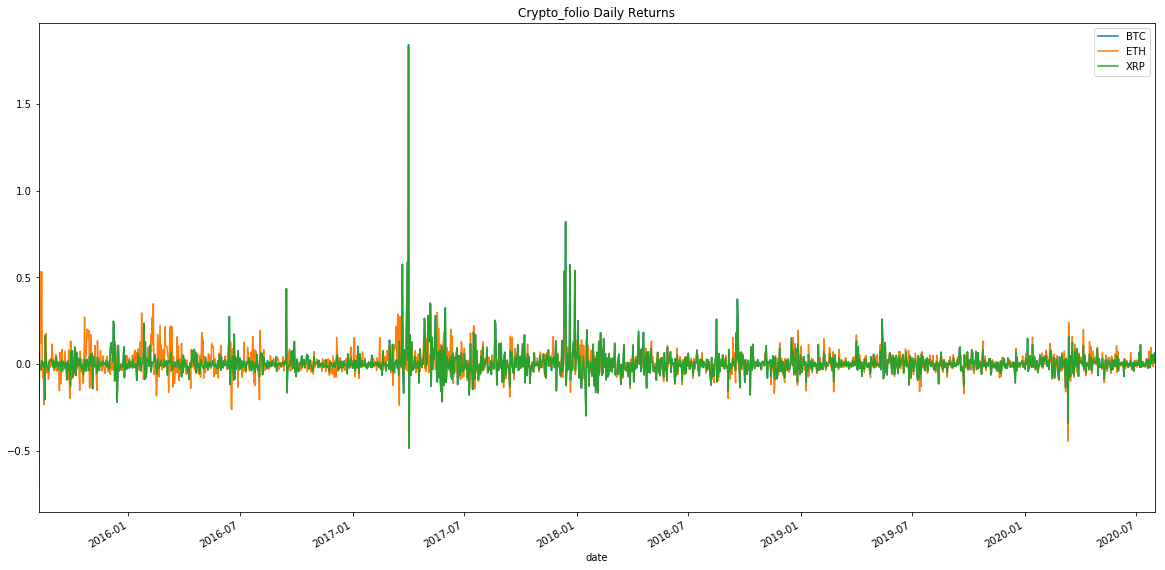

In [226]:
# Visualizing Daily returns for each:
%matplotlib inline
crypto_folio.plot(title="Crypto_folio Daily Returns", figsize=(20,10))

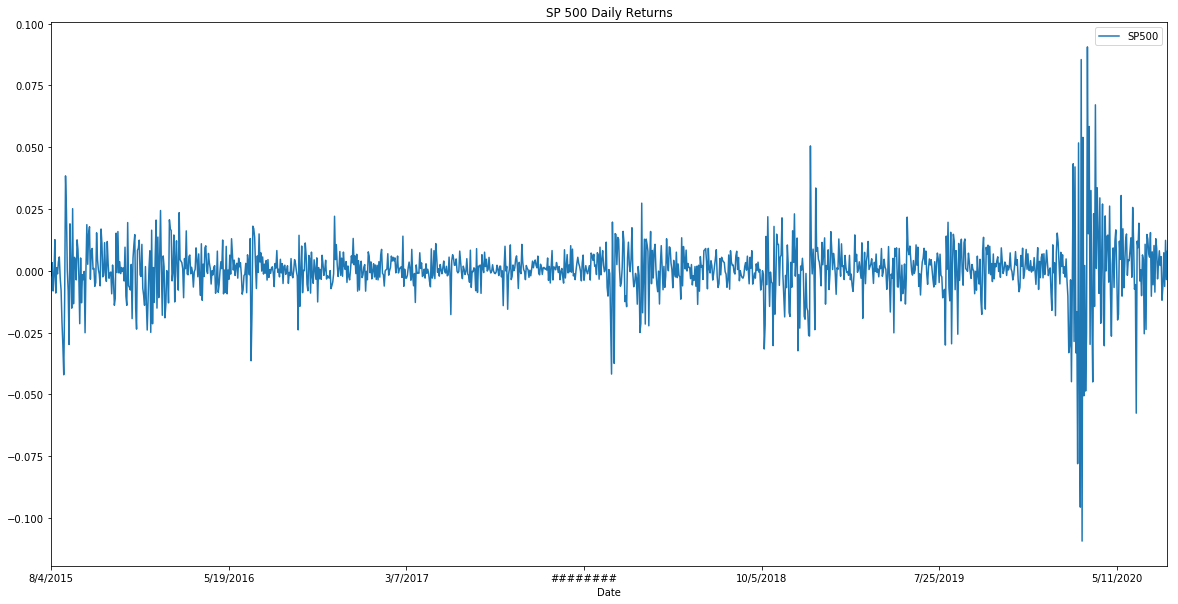

In [227]:
sp500_returns.plot(title="SP 500 Daily Returns", figsize=(20,10))

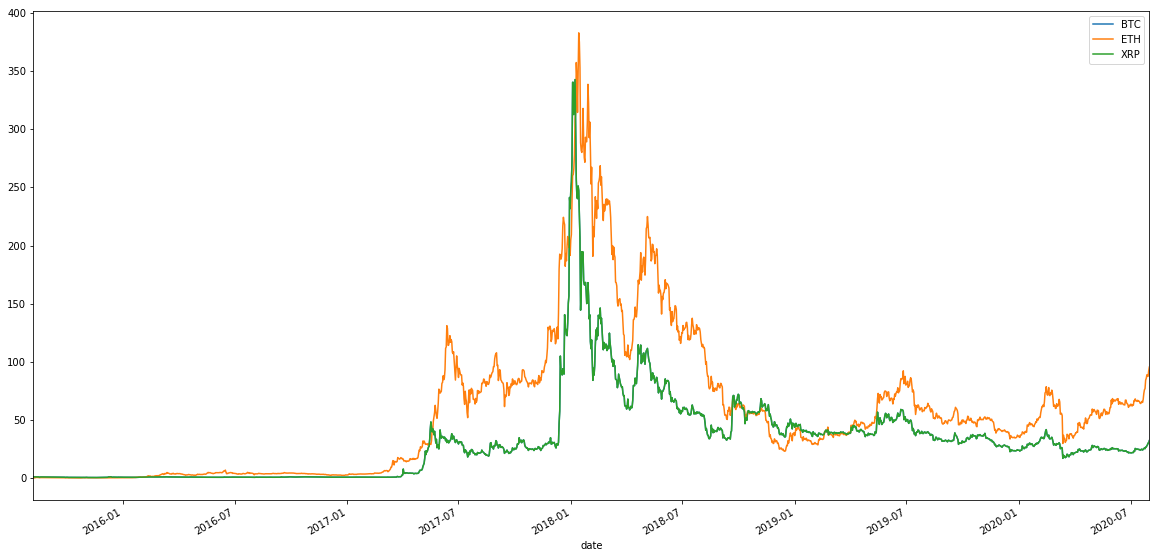

In [228]:
crypto_cum_returns = (1 + crypto_folio).cumprod()
crypto_cum_returns.plot(figsize=(20,10))

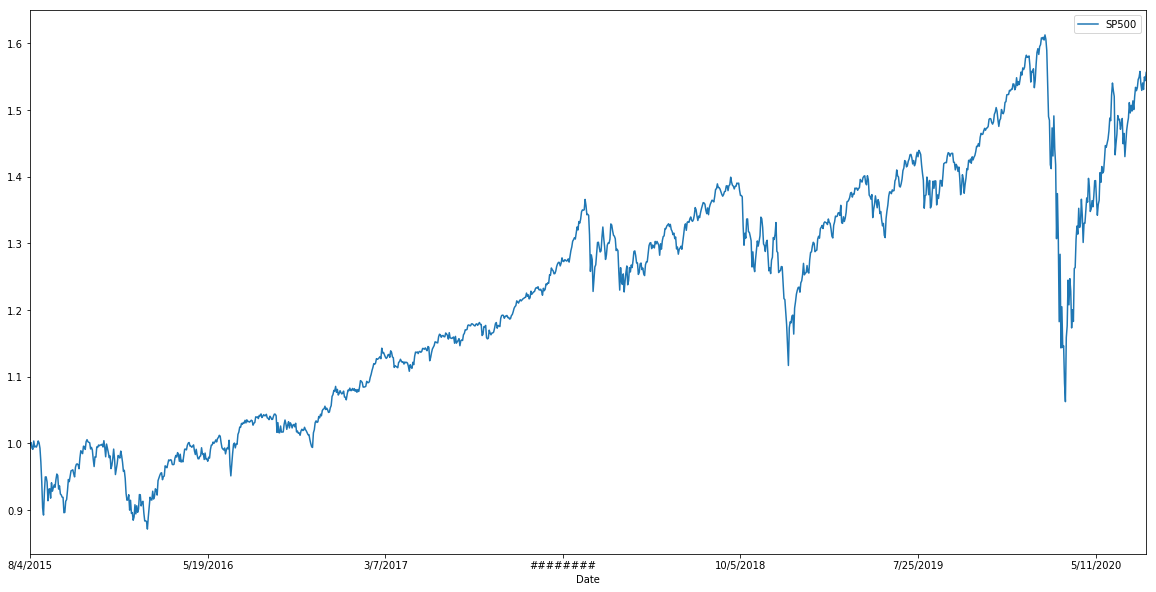

In [229]:
sp500_cum_returns = (1 + sp500_returns).cumprod()
sp500_cum_returns.plot(figsize=(20,10))

In [230]:
crypto_std = crypto_folio.std().sort_values(ascending=True)
crypto_std

ETH    0.067250
BTC    0.081376
XRP    0.081376
dtype: float64

In [232]:
sp500_std = sp500_returns.std().sort_values(ascending=True)
sp500_std

SP500    0.012055
dtype: float64

In [234]:
import numpy as np
crypto_Annual_std = crypto_std * np.sqrt(252*5)
crypto_Annual_std

ETH    2.387150
BTC    2.888574
XRP    2.888574
dtype: float64

In [ ]:
# show the realtion between all of them: I can't because they are combined in one dataframe


In [ ]:
Sharpe Ratio & then representation.
